In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [64]:
#loading the breas cancer dataset into a pandas dataframe
df=pd.read_csv('breast-cancer-wisconsin.csv')
df.head() #having a look at the first five entries of the column, note that the columns are not named correctly

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [65]:
#renaming the columns to their appropriate names

df=df.rename(columns={'1000025':'sample_code_number','5':'clump_thickness','1':' uniformity_of_cell_size','1.1':'uniformity_of_cell_shape'
                  ,'1.2':'marginal_adhesion','2':'single_epithelial_cell_size','1.3':'bare_nuclei','3':'bland_chromatin',
                   '1.4':'normal_nucleoli','1.5':'mitoses','2.1':'Class'})

df.head()  #checking the df for the new column names 


,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [66]:
#counting the number of rows
original_count=df.shape[0]
print("The number of rows in the dataframe is:",original_count)

#counting missing values in the dataframe

print('The total missing values in the dataset is:',df.isna().sum().sum())


#Dropping the sample code number column as it has no use in the model
df.drop('sample_code_number',axis=1,inplace=True)

df.head()

The number of rows in the dataframe is: 698
The total missing values in the dataset is: 0


,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


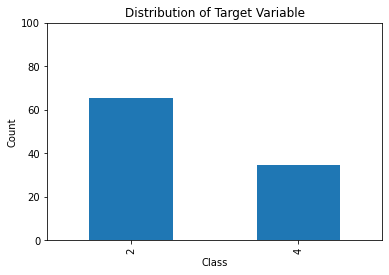

2    65.472779
4    34.527221
Name: Class, dtype: float64


In [67]:
#Let's view the distribution of the target variable using a histrogram. 

class_count=df['Class'].value_counts(normalize=True)*100

class_count.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("Distribution of Target Variable")
plt.ylim(0,100)
plt.show()
print(class_count)


Although the data is somewhat skewed to 2. Contextually speaking we expect that a majority of people testing for cancer will have benign tumors rather than malignant ones. 
The model will not require oversampling in this case. 

In [68]:
#let's change the target variable such that 0 represents benign and 1 represents malignant. 

df['Class']=df['Class'].replace({2:0,4:1})
df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


In [69]:
#It appears there are no missing values as NAN but they are instead registered as '?'
df.replace('?',pd.NA,inplace=True) #replacing '?' with Nans so they can be easily removed
df.dropna(inplace=True)
new_count=df.shape[0]
removed_rows=original_count-new_count
print("The number of removed rows is:",removed_rows)
print("The percentage of removed rows is",(removed_rows/original_count)*100)



The number of removed rows is: 16
The percentage of removed rows is 2.292263610315186


In [70]:
#Let's split our data first. Seperating the target variable from the feature columns

input_features=df.iloc[:,:-1]
target=df['Class']

#creating the train and test data for our model
X_train,X_test,y_train,y_test=train_test_split(input_features,target,test_size=0.3,random_state=42)

#A decision tree is classified and its parameters are tuned using grid search. 
dt=tree.DecisionTreeClassifier()

params={'criterion':['gini','entropy'],
       'max_depth':np.arange(1,20),
       'splitter':['best','random'],
       'max_features':['sqrt','log2']}

clf=GridSearchCV(estimator=dt,param_grid=params,cv=5,n_jobs=-1,verbose=3)

clf.fit(X_train,y_train)

#printing the best values for each parameter
print(clf.best_params_)
best_parameters=clf.best_params_


Fitting 5 folds for each of 152 candidates, totalling 760 fits
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'log2', 'splitter': 'best'}


In [71]:
#training the decision tree model on the best set of optimal hyperparameters
best_dt=tree.DecisionTreeClassifier(**best_parameters)
best_dt.fit(X_train,y_train)

#printing the training score and the testing score
print("The training score is:",best_dt.score(X_train,y_train))
print("The testing score is:",best_dt.score(X_test,y_test))

The training score is: 1.0
The testing score is: 0.9512195121951219


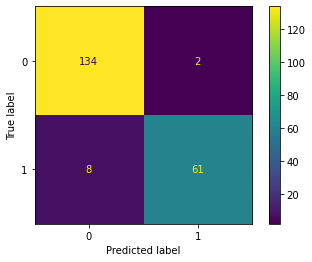

In [72]:
#confusion matrix
predictions=best_dt.predict(X_test)
cm=confusion_matrix(y_test,predictions)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [73]:
#Unravelling the confusion matrix values
tn,fp,fn,tp=cm.ravel()
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)
accuracy=(tp+tn)/(tn+fp+fn+tp)
missclassification_rate=1-accuracy
precision=tp/(tp+fp)

print("The true negative is:",tn)
print("The false positive is:",fp)
print("The false negative is:",fn)
print("The true postive is:",tp)
print("The sensitivity is:",sensitivity)
print("The specificity is:",specificity)
print("The accuracy is:",accuracy)
print("The misclassification rate is:",missclassification_rate)
print("The precision is:",precision)



The true negative is: 134
The false positive is: 2
The false negative is: 8
The true postive is: 61
The sensitivity is: 0.8840579710144928
The specificity is: 0.9852941176470589
The accuracy is: 0.9512195121951219
The misclassification rate is: 0.04878048780487809
The precision is: 0.9682539682539683


I have used a confusion matrix to give me more insight about the performance of the model. As we can see the accuracy of the model and the precision of the model is great. However, we can see where the drop in accuracy comes from. The model is performing better at identfying people with benign tumor than it is with a malignant tumor. This can be seen from the sensitivity and specificity measures. 